<a href="https://colab.research.google.com/github/cullena20/aistuff/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalones!

We will predict the age of abalones given various features. This is a good excersise in working with data from csv files and training basic regression models.

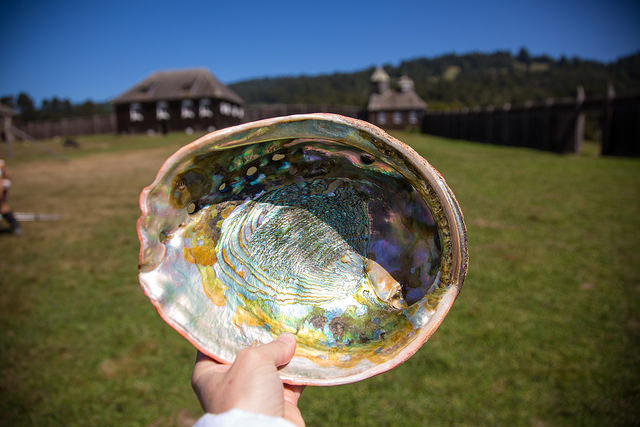

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing

## Data!


Import the csv abalone data and label the features.

In [ ]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])
abalone_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

We can explore the data here. There are 3320 testing and 850 training examples. Each have 8 features. We will split them into 7 features with age being the label we aim to predict.


In [ ]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
print(abalone_train.shape)  
print(abalone_test.shape)

(3320, 8)
(850, 8)


We are splitting up the data and representing it in ways that we can work with (although I don't think the np.asarray's are necessary).


In [ ]:
abalone_features = abalone_train.drop('Age', axis=1)
abalone_label = abalone_train.pop('Age')
test_features = abalone_test.drop('Age', axis=1)
test_label = abalone_test.pop('Age')

In [ ]:
print(abalone_train)
print(abalone_label)

      Length  Diameter  Height  ...  Shucked weight  Viscera weight  Shell weight
0      0.435     0.335   0.110  ...          0.1355          0.0775        0.0965
1      0.585     0.450   0.125  ...          0.3545          0.2075        0.2250
2      0.655     0.510   0.160  ...          0.3960          0.2825        0.3700
3      0.545     0.425   0.125  ...          0.2940          0.1495        0.2600
4      0.545     0.420   0.130  ...          0.3740          0.1695        0.2300
...      ...       ...     ...  ...             ...             ...           ...
3315   0.605     0.475   0.180  ...          0.3940          0.2190        0.2950
3316   0.700     0.525   0.190  ...          0.7070          0.3650        0.4300
3317   0.530     0.420   0.130  ...          0.3745          0.1670        0.2490
3318   0.395     0.315   0.105  ...          0.1185          0.0910        0.1195
3319   0.450     0.355   0.120  ...          0.1145          0.0665        0.1600

[3320 rows x 7 

The below code is optional. It changes the features and labels into simple np arrays rather than pandas dataframes.

In [ ]:
abalone_features = np.asarray(abalone_features)
abalone_label = np.asarray(abalone_label)
test_features = np.asarray(test_features)
test_label = np.asarray(test_label)
print(abalone_features)
print(abalone_label)

[[0.435  0.335  0.11   ... 0.1355 0.0775 0.0965]
 [0.585  0.45   0.125  ... 0.3545 0.2075 0.225 ]
 [0.655  0.51   0.16   ... 0.396  0.2825 0.37  ]
 ...
 [0.53   0.42   0.13   ... 0.3745 0.167  0.249 ]
 [0.395  0.315  0.105  ... 0.1185 0.091  0.1195]
 [0.45   0.355  0.12   ... 0.1145 0.0665 0.16  ]]
[ 7  6 14 ... 11 16 19]


## Linear Regression with Sklearn


Train a simple linear regression model from sklearn. 

In [ ]:
reg_mod = LinearRegression(fit_intercept=True, normalize=True)
reg_mod.fit(abalone_features, abalone_label)
preds = reg_mod.predict(test_features)
mse = mean_squared_error(preds, test_label)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.523331059501299


Here we can visualize our results better by plotting the predicted age versus the real age.

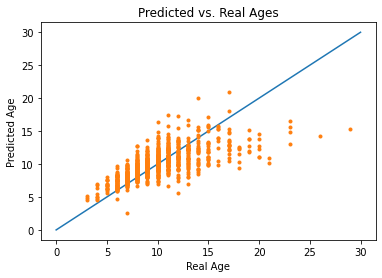

In [ ]:
plt.plot([0,30],[0,30]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Ages")
plt.xlabel("Real Age")
plt.ylabel("Predicted Age")
plt.plot(test_label, preds, '.')
plt.show()

## Regression with Keras!


We can also make a model using a simple nueral network with Keras. Observe that this process is very similar to the one in sklearn. The only difference is we must define our nueral network using more steps
.


In [ ]:
# Note this basic preprocessing layer that we can add to our nueral network.
normalize = preprocessing.Normalization()
normalize.adapt(abalone_features)

In [ ]:
nn = tf.keras.Sequential([
    normalize,
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

nn.compile(loss = tf.losses.MeanSquaredError(),
          optimizer = tf.optimizers.Adam(),)

In [ ]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 7)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 592
Trainable params: 577
Non-trainable params: 15
_________________________________________________________________


In [ ]:
nn.fit(abalone_features, abalone_label, epochs=20)

Epoch 1/20
104/104 [==============================] - 0s 1ms/step - loss: 99.2759
Epoch 2/20
104/104 [==============================] - 0s 1ms/step - loss: 47.8450
Epoch 3/20
104/104 [==============================] - 0s 1ms/step - loss: 30.0457
Epoch 4/20
104/104 [==============================] - 0s 1ms/step - loss: 22.0942
Epoch 5/20
104/104 [==============================] - 0s 1ms/step - loss: 13.0001
Epoch 6/20
104/104 [==============================] - 0s 1ms/step - loss: 8.3137
Epoch 7/20
104/104 [==============================] - 0s 1ms/step - loss: 6.6403
Epoch 8/20
104/104 [==============================] - 0s 1ms/step - loss: 6.3715
Epoch 9/20
104/104 [==============================] - 0s 1ms/step - loss: 5.6380
Epoch 10/20
104/104 [==============================] - 0s 1ms/step - loss: 6.1985
Epoch 11/20
104/104 [==============================] - 0s 1ms/step - loss: 5.6250
Epoch 12/20
104/104 [==============================] - 0s 1ms/step - loss: 5.2379
Epoch 13/20
104/104 

Here we can evaluate this model. The mean squared error is not much lower than the linear regression model created using sklearn.

In [ ]:
nn_preds = nn.predict(test_features)
mse = mean_squared_error(nn_preds, test_label)  # mse is from sklearn
print("Mean Squared Error:", mse)

Mean Squared Error: 5.290317276188207


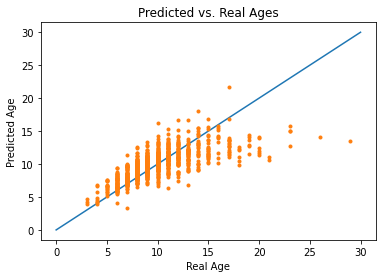

In [ ]:
plt.plot([0,30],[0,30]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Ages")
plt.xlabel("Real Age")
plt.ylabel("Predicted Age")
plt.plot(test_label, nn_preds, '.')
plt.show()